Full Formula (Cs1 Pb1 Br3)
Reduced Formula: CsPbBr3
abc   :   6.017340   6.017326   6.017336
angles:  89.999915  90.000028  90.000143
Sites (5)
  #  SP           a    b    c    magmom
---  ----  --------  ---  ---  --------
  0  Cs    1         1    1           0
  1  Pb    0.499999  0.5  0.5         0
  2  Br    0.5       0.5  1           0
  3  Br    0.5       1    0.5         0
  4  Br    0         0.5  0.5         0
AxesSubplot(0.2,0.5025;0.7x0.3775)
4


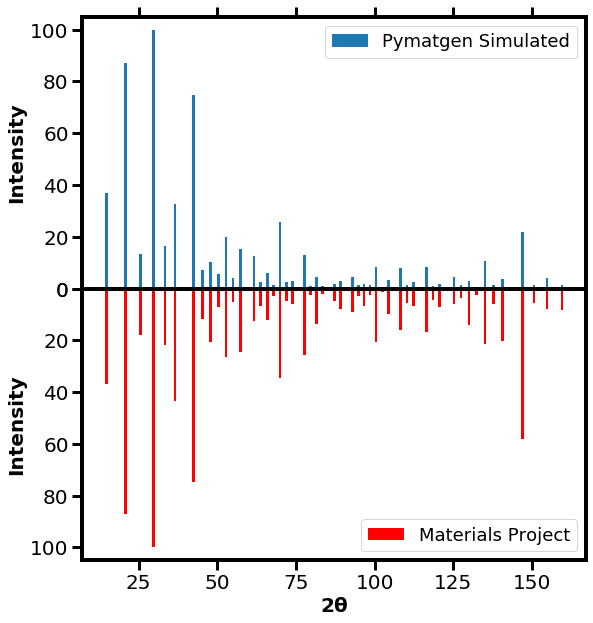

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry import analyzer
from pymatgen.analysis.diffraction import xrd
from ase import Atoms
from ase.utils import xrdebye
from pymatgen.io.ase import AseAtomsAdaptor
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append('/scratch/e/esargent/ajay15')
import DataAnalysis as aj

xrd_ana = xrd.XRDCalculator(wavelength = 'CuKa')

key = 'PGaO0oi7Tz4vaTq8px'
mpr = MPRester(key)

data = mpr.query(criteria ={"task_id":'mp-600089'}, properties = ["xrd.Cu", "spacegroup"])

test_struc = mpr.get_structure_by_material_id('mp-600089')

print (test_struc)


test_patt = xrd_ana.get_pattern(test_struc, two_theta_range=None)


f, ax = plt.subplots(nrows = 2, ncols = 1, figsize = [10,10], sharex = True)

f.subplots_adjust(hspace = 0, left = 0.2)

ax[0].bar(test_patt.x, test_patt.y, label = 'Pymatgen Simulated')
ax[0].xaxis.tick_top()
print (ax[0])
ax[1].invert_yaxis()


test = np.array(data[0]['xrd.Cu']['pattern'])
print(len(test[1]))

ax[1].bar(test[:,2], test[:,0], label = 'Materials Project', color = 'r')


aj.figure_quality_axes(ax[0], r'2$\bf{\theta}$', 'Intensity', '', legend = True)

aj.figure_quality_axes(ax[1], r'2$\bf{\theta}$', 'Intensity', '', legend = True)

f.savefig('Pymatgen vs MP.png', format = 'png', dpi = 1200)

plt.show()

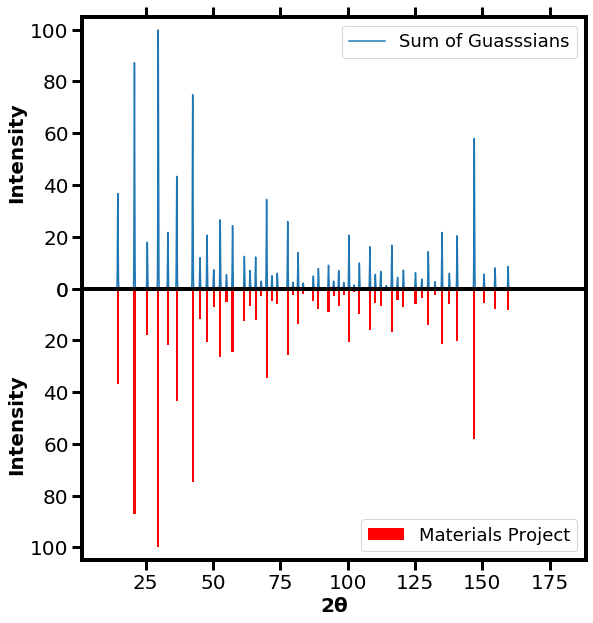

In [2]:
def guassian(x, a, b, c):
    return a*np.exp(-(x - b)**2./(2.*c**2.))


two_theta = np.linspace(10, 180, 10000)

intens = np.zeros(len(two_theta))

for i, peak in enumerate(test[:,2]):
    intens+= guassian(two_theta, test[i,0], peak, 0.11)
    

f3, ax3 = plt.subplots(nrows = 2, ncols = 1, figsize = [10,10], sharex = True)
f3.subplots_adjust(hspace = 0, left = 0.2)

ax3[1].bar(test[:,2], test[:,0], label = 'Materials Project', color = 'r')
ax3[0].plot(two_theta, intens, label = 'Sum of Guasssians')


ax3[0].set_ylim([0,105])
ax3[1].set_ylim([0,105])
aj.figure_quality_axes(ax3[0], r'2$\bf{\theta}$', 'Intensity', '', legend = True)

aj.figure_quality_axes(ax3[1], r'2$\bf{\theta}$', 'Intensity', '', legend = True)


ax3[1].invert_yaxis()
ax3[0].xaxis.tick_top()
f3.savefig('Engineered for Uniform Spacing.png', format = 'png', dpi = 1200)



In [14]:
test = mpr.get_materials_id_from_task_id('mp-19')
import pandas as pd



to_query = ["mp-"+ str(i) for i in range(42088,44088+10000)]
data = mpr.query(chunk_size = 1000,criteria={'material_id':{'$in':to_query}}, properties = ['material_id','spacegroup.number','xrd.Cu.pattern'])
data

[{'material_id': 'mp-42089',
  'spacegroup.number': 4,
  'xrd.Cu.pattern': [[0.004403283393521428,
    [0, 0, 1],
    8.447920602618405,
    10.466598920166517],
   [83.95658696940993, [0, 1, 1], 12.84594566098049, 6.891374657553152],
   [43.107926103350856, [1, 0, 0], 12.87158085597564, 6.877707312179489],
   [0.02687832288124622, [1, 0, -1], 14.010161829528872, 6.321225681508427],
   [0.35865180056136275, [1, 1, 0], 16.117711995454137, 5.499098100944396],
   [0.06928258670464604, [1, 0, 1], 16.706392893717, 5.306630224532873],
   [3.1354142065717086, [0, 0, 2], 16.94219710675381, 5.233299460083258],
   [5.612152569861618, [1, 1, -1], 17.04508898748656, 5.2019401179791265],
   [63.63810541288359, [1, 0, -2], 19.277023855047602, 4.604391661479805],
   [100.0, [1, 1, 1], 19.332728830746074, 4.591250219576601],
   [46.7046613195405, [0, 2, 0], 19.389020386802002, 4.578047476608732],
   [0.08450192871317382, [0, 1, 2], 19.537844576910526, 4.543510169174297],
   [0.12017421831105778, [0, 2

In [17]:
two_theta = {x['material_id']:[np.array(x['xrd.Cu.pattern'])] for i,x in enumerate(data)}
intens = {x['material_id']:[np.array(x['xrd.Cu.pattern'])[:,0]] for i,x in enumerate(data)}
test = pd.DataFrame.from_dict(two_theta, orient = 'index', columns = ['two_theta'])
test['intensity'] = pd.DataFrame.from_dict(intens, orient = 'index')


df_all = pd.DataFrame(columns = ['two_theta','intensity'])

df_all = df_all.append(test)
df_all

two_theta  \
mp-1120725  [[0.004183879110489195, [0, 1, 1], 10.48616883...   
mp-19       [[10.885907326737861, [1, 0, -1, 0], 22.755387...   

                                                    intensity  
mp-1120725  [0.004183879110489195, 36.66863497711346, 30.3...  
mp-19       [10.885907326737861, 100.0, 41.27876870866844,...

In [105]:
i = 0
flag = True

while flag:
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-105-41a3fc8e015e>, line 7)